In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
x = np.arange(start=-2.,stop = 2.,step = 0.01)
y = x+x**2+x**3+x**4

<Axes: >

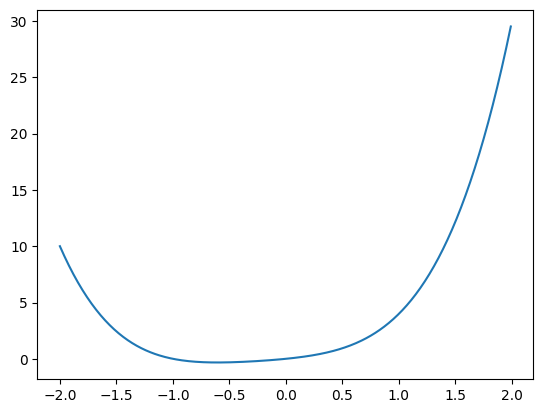

In [3]:
sns.lineplot(x=x, y=y)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

%matplotlib qt5

# Define the Rosenbrock function
def rosenbrock(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

# Define the Hessian matrix of the Rosenbrock function
def hessian_rosenbrock(x):
    h11 = 2 - 400 * x[1] + 1200 * x[0]**2
    h12 = -400 * x[0]
    h21 = -400 * x[0]
    h22 = 200
    return np.array([[h11, h12], [h21, h22]])

# Visualize the Rosenbrock function and Hessian matrix
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock([X, Y])

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Rosenbrock Function')

# Find the minimum point using optimization
res = minimize(rosenbrock, x0=[-1.5, 1.5], method='BFGS', jac=None, hess=None)
minimum_point = res.x

# Plot the minimum point
ax.scatter(minimum_point[0], minimum_point[1], rosenbrock(minimum_point), color='red', label='Minimum Point')

# Check positive definiteness of the Hessian matrix at the minimum point
hessian_at_min = hessian_rosenbrock(minimum_point)
eigenvalues, _ = np.linalg.eig(hessian_at_min)
if np.all(eigenvalues > 0):
    print("Hessian matrix is positive definite at the minimum point.")
else:
    print("Hessian matrix is not positive definite at the minimum point.")

plt.legend()
plt.show()


Hessian matrix is positive definite at the minimum point.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib qt5

# Define a function with multiple local minima and maxima
def multiple_valleys(x, y):
    return np.sin(x) * np.cos(y)

# Define the Hessian matrix of the function
def hessian_multiple_valleys(x, y):
    h11 = -np.sin(x) * np.cos(y)  # Second partial derivative with respect to x twice
    h12 = -np.cos(x) * np.sin(y)  # Mixed partial derivative
    h21 = -np.cos(x) * np.sin(y)  # Mixed partial derivative
    h22 = -np.sin(x) * np.cos(y)  # Second partial derivative with respect to y twice
    return np.array([[h11, h12], [h21, h22]])

# Define the range for x and y
x_range = np.linspace(-3, 3, 100)
y_range = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x_range, y_range)

# Calculate the function values and Hessian matrix values
Z = multiple_valleys(X, Y)
H = np.zeros_like(Z)

for i in range(len(x_range)):
    for j in range(len(y_range)):
        hessian = hessian_multiple_valleys(x_range[i], y_range[j])
        eigenvalues, _ = np.linalg.eig(hessian)
        if np.all(eigenvalues > 0):
            H[i, j] = 1  # Positive definite Hessian
        else:
            H[i, j] = 0  # Non-positive definite Hessian

# Plot the function surface and the regions with positive definite Hessian
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Function with Multiple Valleys and Hills')

# Create a custom colormap for positive definite Hessian regions
cmap = plt.cm.get_cmap('coolwarm', 2)
cmap.set_under('green')

# Plot the regions with positive definite Hessian
ax.contourf(X, Y, H, levels=[-0.5, 0.5, 1.5], colors=[cmap(0), cmap(1)], alpha=1)

# Add a color bar to show the colormap
cbar = fig.colorbar(surf, ticks=[-1, 0, 1])
cbar.set_label('Function Value')

plt.show()


C:\Users\esual\AppData\Local\Temp\ipykernel_1296\3118038820.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm', 2)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define a function with valleys and hills
def function_with_valleys(x, y):
    return np.sin(x) * np.sin(y)

# Define the Hessian matrix of the function
def hessian_function_with_valleys(x, y):
    h11 = -np.sin(y) * np.cos(x)  # Second partial derivative with respect to x twice
    h12 = -np.cos(y) * np.sin(x)  # Mixed partial derivative
    h21 = -np.cos(y) * np.sin(x)  # Mixed partial derivative
    h22 = -np.sin(y) * np.cos(x)  # Second partial derivative with respect to y twice
    return np.array([[h11, h12], [h21, h22]])

# Define the range for x and y
x_range = np.linspace(-3, 3, 100)
y_range = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x_range, y_range)

# Calculate the function values and Hessian matrix values
Z = function_with_valleys(X, Y)
H = np.zeros_like(Z)

for i in range(len(x_range)):
    for j in range(len(y_range)):
        hessian = hessian_function_with_valleys(x_range[i], y_range[j])
        eigenvalues, _ = np.linalg.eig(hessian)
        if np.all(eigenvalues > 0):
            H[i, j] = 1  # Positive definite Hessian
        else:
            H[i, j] = 0  # Non-positive definite Hessian

# Plot the function surface and the regions with positive definite Hessian
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Function with Valleys and Hills')

# Create a custom colormap for positive definite Hessian regions
cmap = plt.cm.get_cmap('coolwarm', 2)
cmap.set_under('lightgrey')

# Plot the regions with positive definite Hessian
ax.contourf(X, Y, H, levels=[-0.5, 0.5, 1.5], colors=[cmap(0), cmap(1)], alpha=0.5)

# Add a color bar to show the colormap
cbar = fig.colorbar(surf, ticks=[-1, 0, 1])
cbar.set_label('Function Value')

plt.show()


C:\Users\esual\AppData\Local\Temp\ipykernel_1296\2845862831.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm', 2)
